Nguyễn Viết Ái Nhi - 6351071054
Dữ liệu đã chuẩn hóa và sẵn sàng cho K-Means
Ma trận nhầm lẫn:
[[344  13]
 [ 37 175]]

Độ chính xác của gom cụm: 91.21%


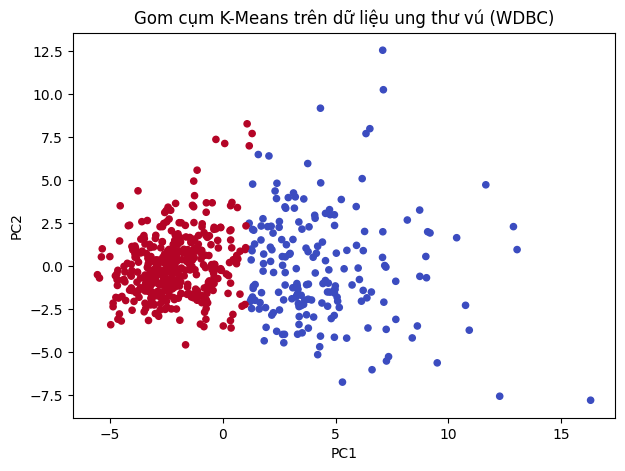

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

print("Nguyễn Viết Ái Nhi - 6351071054")

# Đọc file (đã upload lên Colab)
df = pd.read_csv("/content/wdbc.data", header=None)

# Đặt tên cột theo mô tả
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
df.columns = columns

# Xóa cột ID vì không dùng cho gom cụm
df = df.drop(columns=["ID"])

# Đổi nhãn: M → 1 (ác tính), B → 0 (lành tính)
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

# Lấy dữ liệu đầu vào (30 features)
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dữ liệu đã chuẩn hóa và sẵn sàng cho K-Means")

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Tìm cách đối chiếu cụm <-> nhãn thật
mapping = {}

for cluster_label in [0, 1]:
    true_labels = y[clusters == cluster_label]
    mapped_label = true_labels.mode()[0]  # Nhãn chiếm đa số
    mapping[cluster_label] = mapped_label

# Ánh xạ lại cụm thành nhãn Benign/Malignant
predicted_labels = np.array([mapping[c] for c in clusters])

cm = confusion_matrix(y, predicted_labels)
acc = accuracy_score(y, predicted_labels)

print("Ma trận nhầm lẫn:")
print(cm)
print("\nĐộ chính xác của gom cụm: {:.2f}%".format(acc * 100))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="coolwarm", s=20)
plt.title("Gom cụm K-Means trên dữ liệu ung thư vú (WDBC)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

